In [2]:
from transmission_data import transmission_function
from wigrad import Wiggler, WigglerRadiationSimulator
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wiggler = Wiggler(K_peak=1.0)
x_max = 0.007257142857142857
y_max = x_max/np.sqrt(2)
n_x = 256
n_y = int(n_x/np.sqrt(2))
n_l = 80
l_min = 0.85
l_max = 1.3
x_step = x_max/(n_x-1)
y_step = y_max/(n_y-1)
l_step = (l_max-l_min)/(n_l-1)
mesh = (np.linspace(x_step/2, x_max+x_step/2, n_x),
        np.linspace(y_step/2, y_max+y_step/2, n_y),
        np.linspace(l_min, l_max, n_l))
spectral_transmission = transmission_function(mesh[2])
wr_sim = WigglerRadiationSimulator(
    wiggler,
    mesh,
    gamma=100/0.511,
    harmonics=[1],
    aperture=None,#'ellipse',
    only_calc_sum_of_both_polarizations=True,  # if False, then both polarizations are calculated separately
    spectral_transmission=None#spectral_transmission
    )

In these spectral data I assume that the transmission sharply goes to zero where the data are not given in the specs.

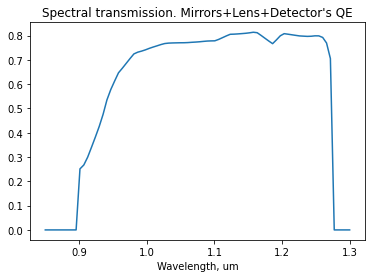

In [4]:
plt.plot(mesh[2], spectral_transmission)
plt.title("Spectral transmission. Mirrors+Lens+Detector's QE")
plt.xlabel("Wavelength, um")
plt.show()

In [5]:
wr_sim.calc_photon_flux_on_meshgrid()

In [6]:
wr_sim.extend_results_using_symmetries()

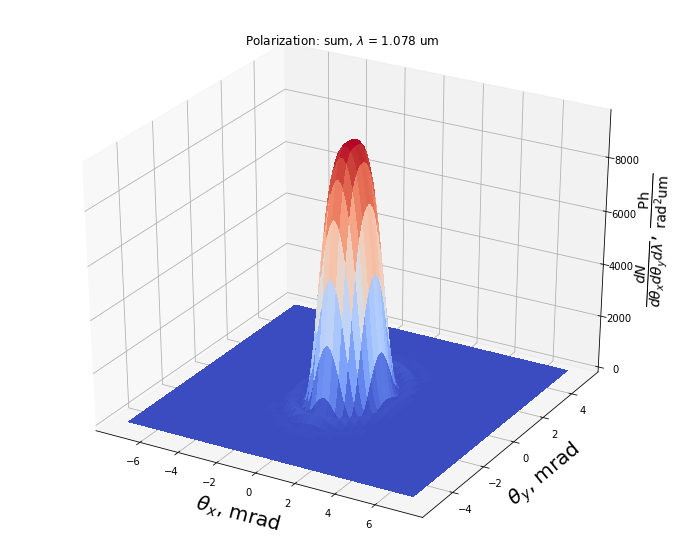

In [7]:
wr_sim.show_angular_distribution(index_of_lambda=int(n_l/2))

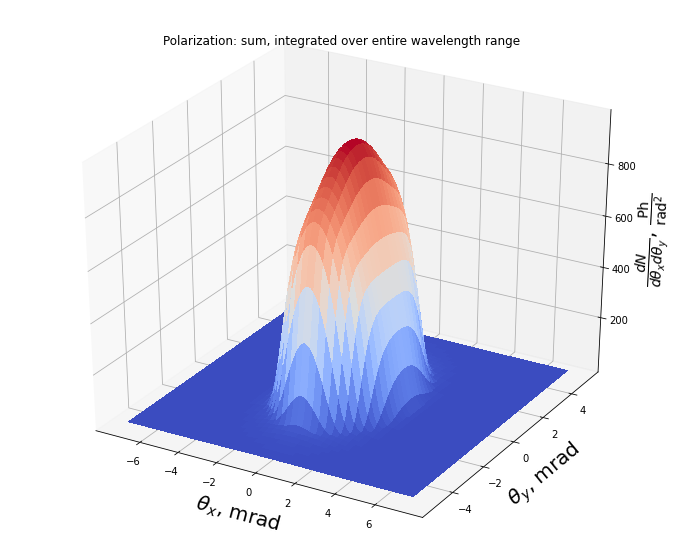

In [8]:
wr_sim.show_angular_distribution(polarization='sum')

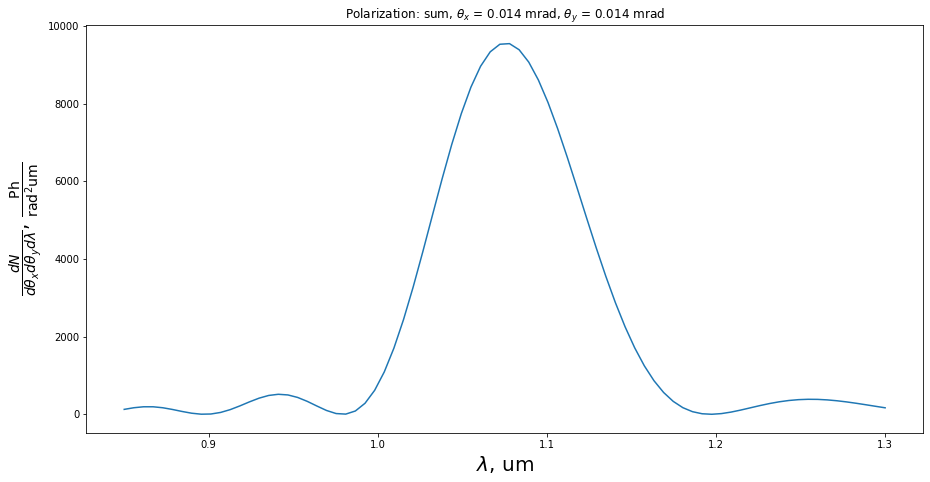

In [9]:
wr_sim.show_spectral_distribution(angular_indexes_tuple=(n_x,n_y))

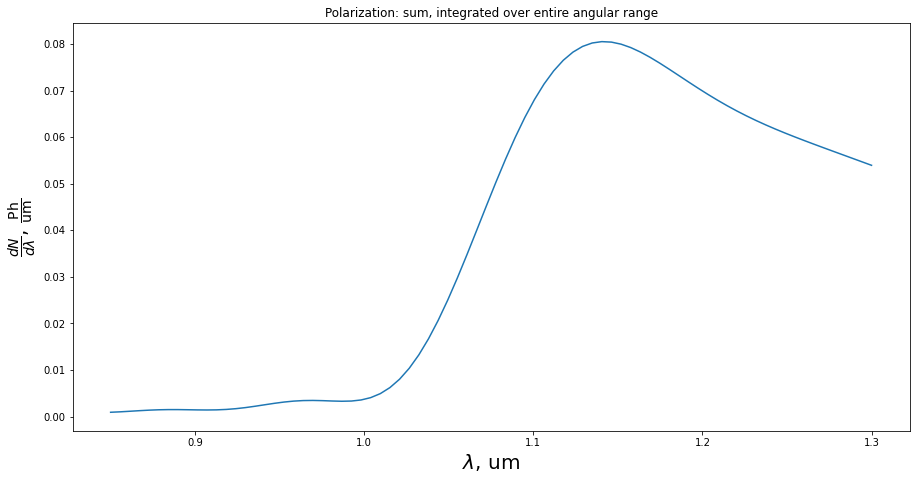

In [10]:
wr_sim.show_spectral_distribution(polarization='sum')

In [11]:
wr_sim.get_total_photon_flux(polarization='sum')

0.017169586337238977

One conclusion: with the model that the transmission of the mirrors sharly drops to zero at $\sim 1.28 $um, the total photon flux is very sensitive on the undulator's K pararameter. There's is a K value between 1.0 and 1.1, where we get perfect agreement between theoretical flux and measured flux.

Also: it looks like the angular distribution is significantly smaller than the elliptical aperturture, so it is safe to believe that all the light from the undulator really reached the lens. In addition, since the sensitive area was large (1 mm), I think we should believe that all the light from the lens was collected by the detector. So we should just work with the empirically measured signal amplitude/current coefficient (for plotting the green Poisson statistics line).